# WASP-17

**Note**: This target has both stare and scan mode data. Here we use only the scan mode data.

**Note**: This planet seems to have large TTVs, which `ombre` can't currently take into account, so we only use the HST data to fit the transit

In [3]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [4]:
name = 'WASP-17'

In [5]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
fnames = fnames[[f.split('/')[-1].startswith('ideu') for f in fnames]]

In [16]:
obs = om.Observation.from_files(fnames)

In [17]:
obs

WASP-17 [3 Visits]

In [29]:
clc = lcs = lk.search_lightcurve(name, author='SPOC').download_all().stitch().remove_nans()
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

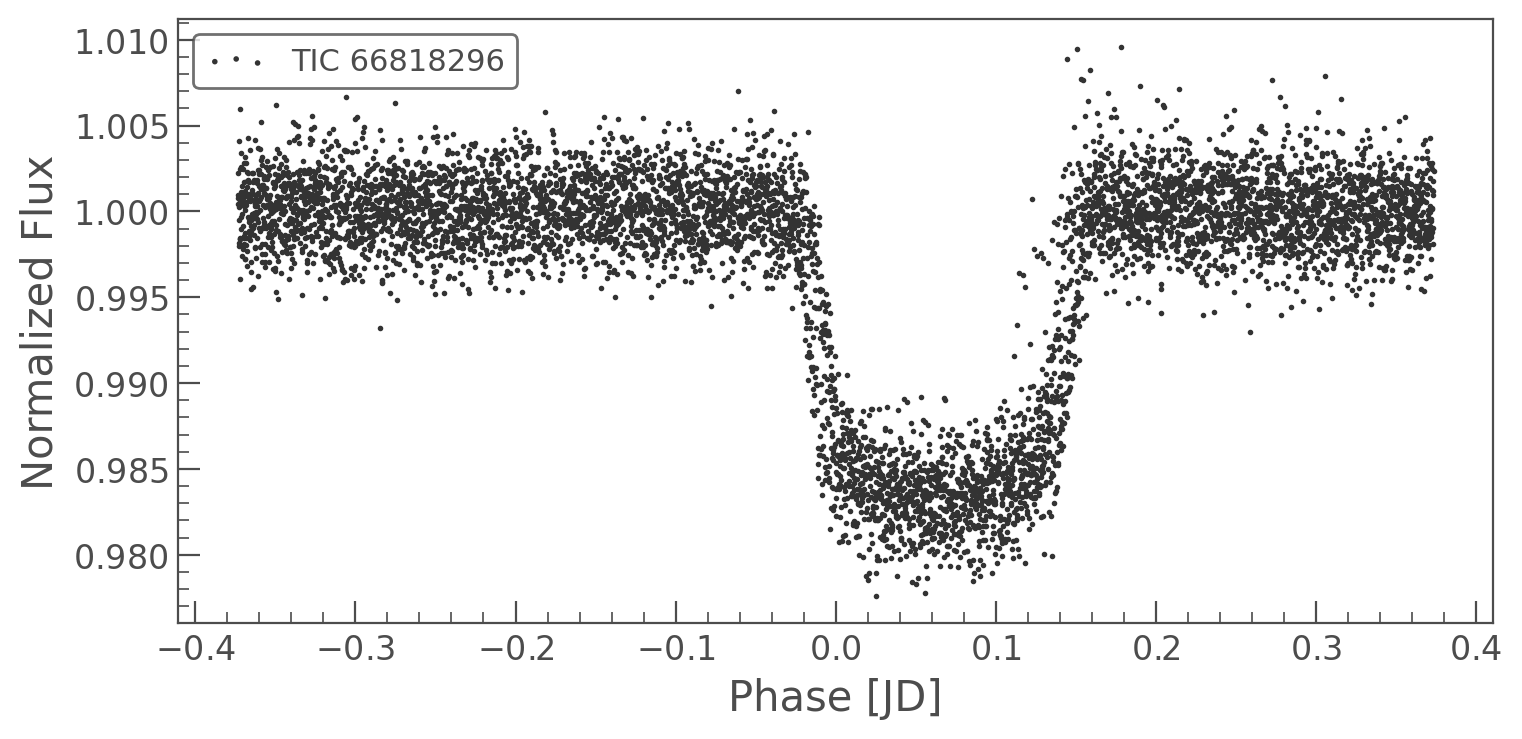

In [33]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [53]:
obs.t0 = 2458021.97637267
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

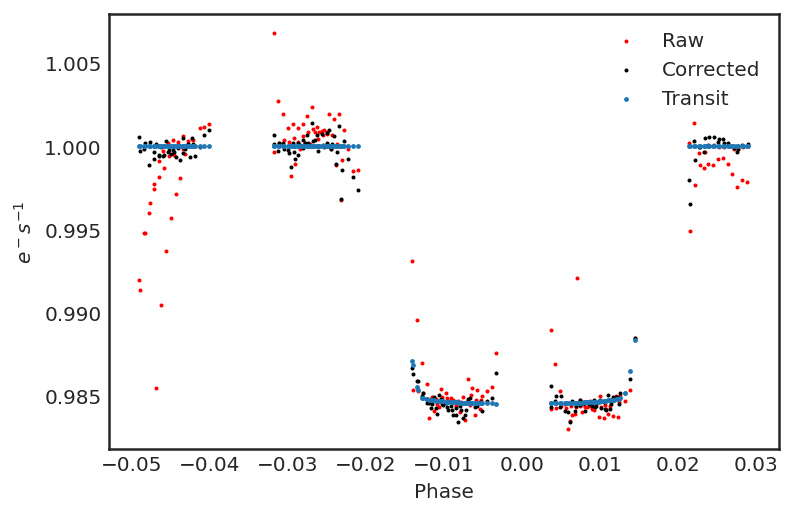

In [54]:
obs.plot()

In [55]:
obs.fit_model()

Fitting Transit/Eclipse Model: 100%|██████████████| 3/3 [00:24<00:00,  8.18s/it]


<AxesSubplot:title={'center':'WASP-17 Stellar Spectrum'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

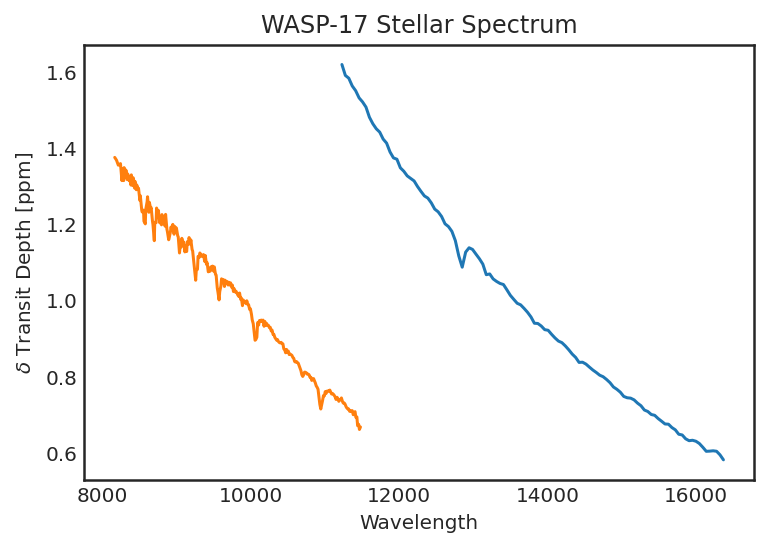

In [56]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

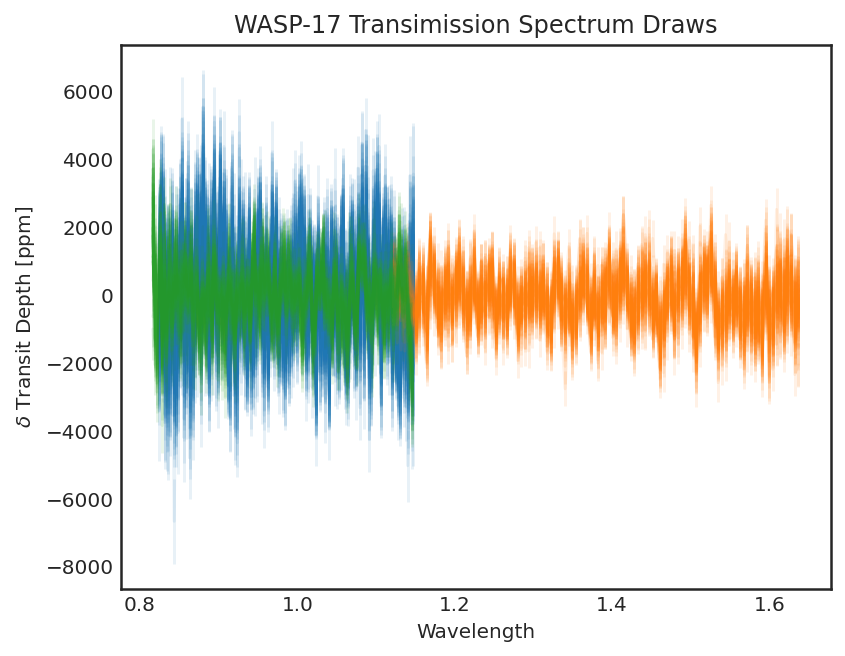

In [57]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

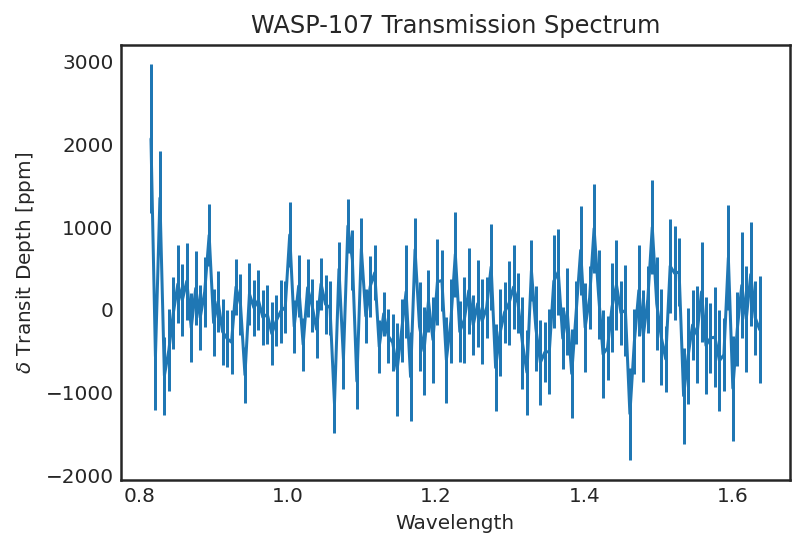

In [58]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [59]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

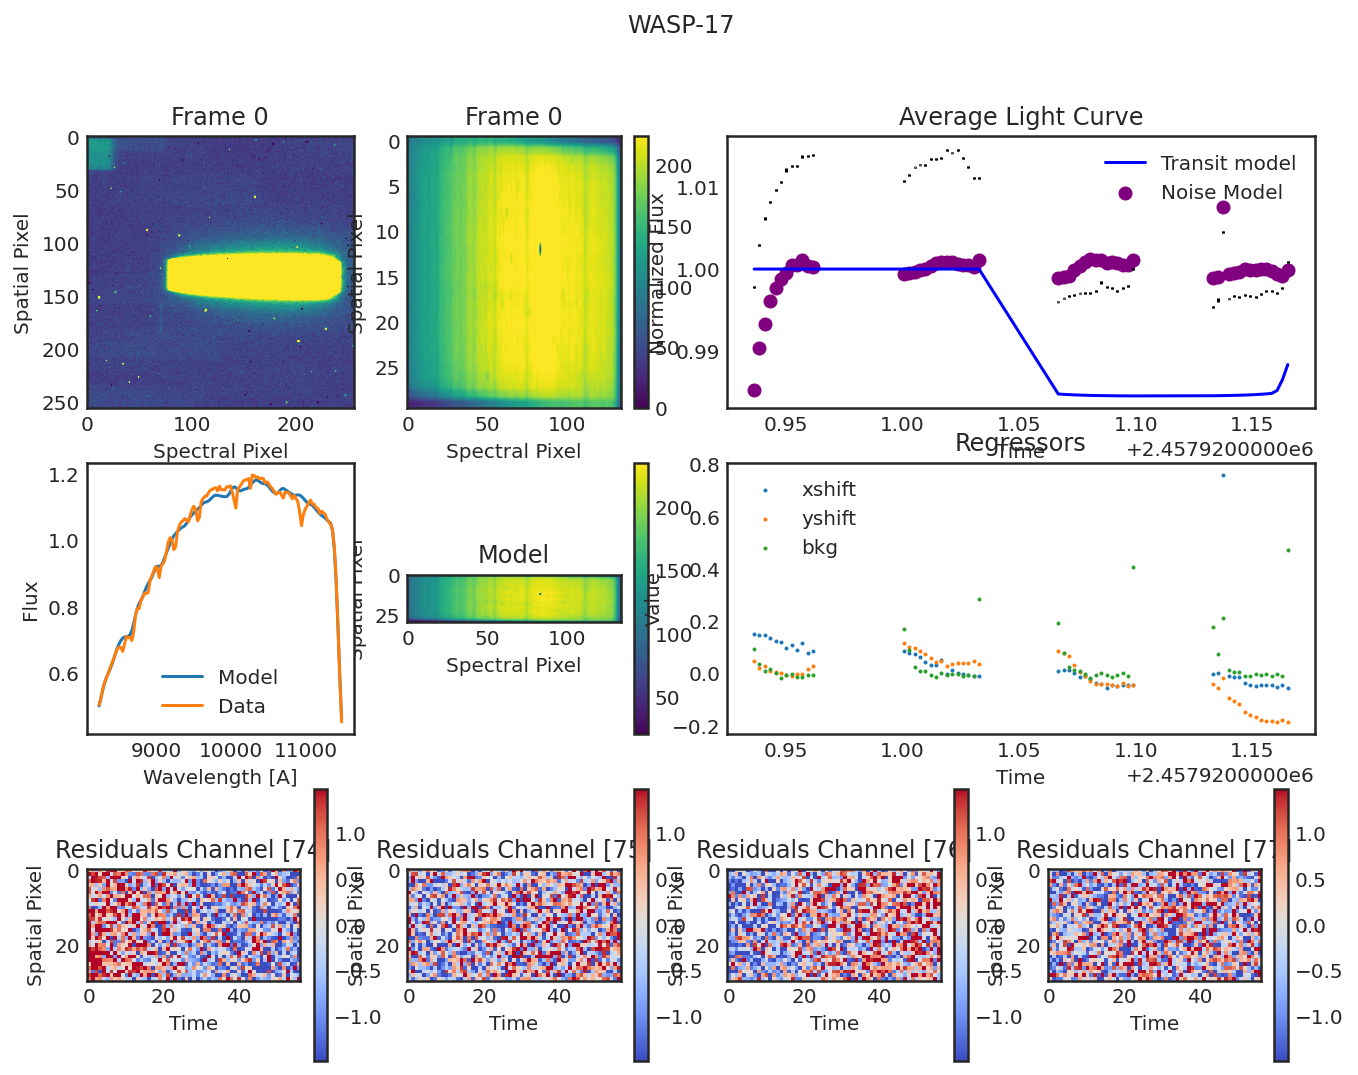

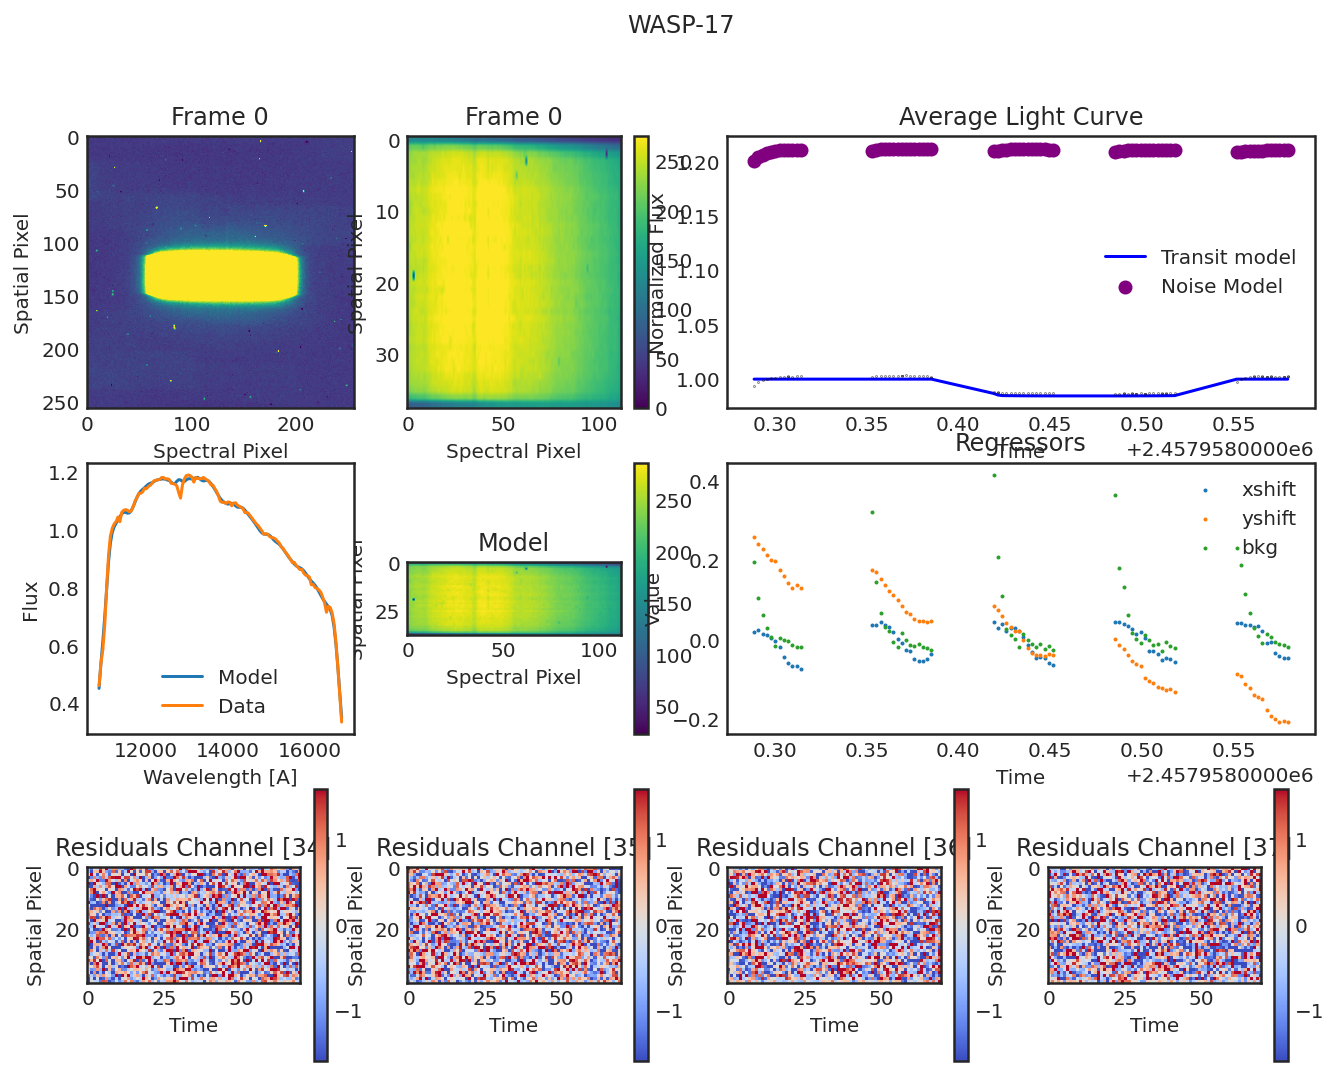

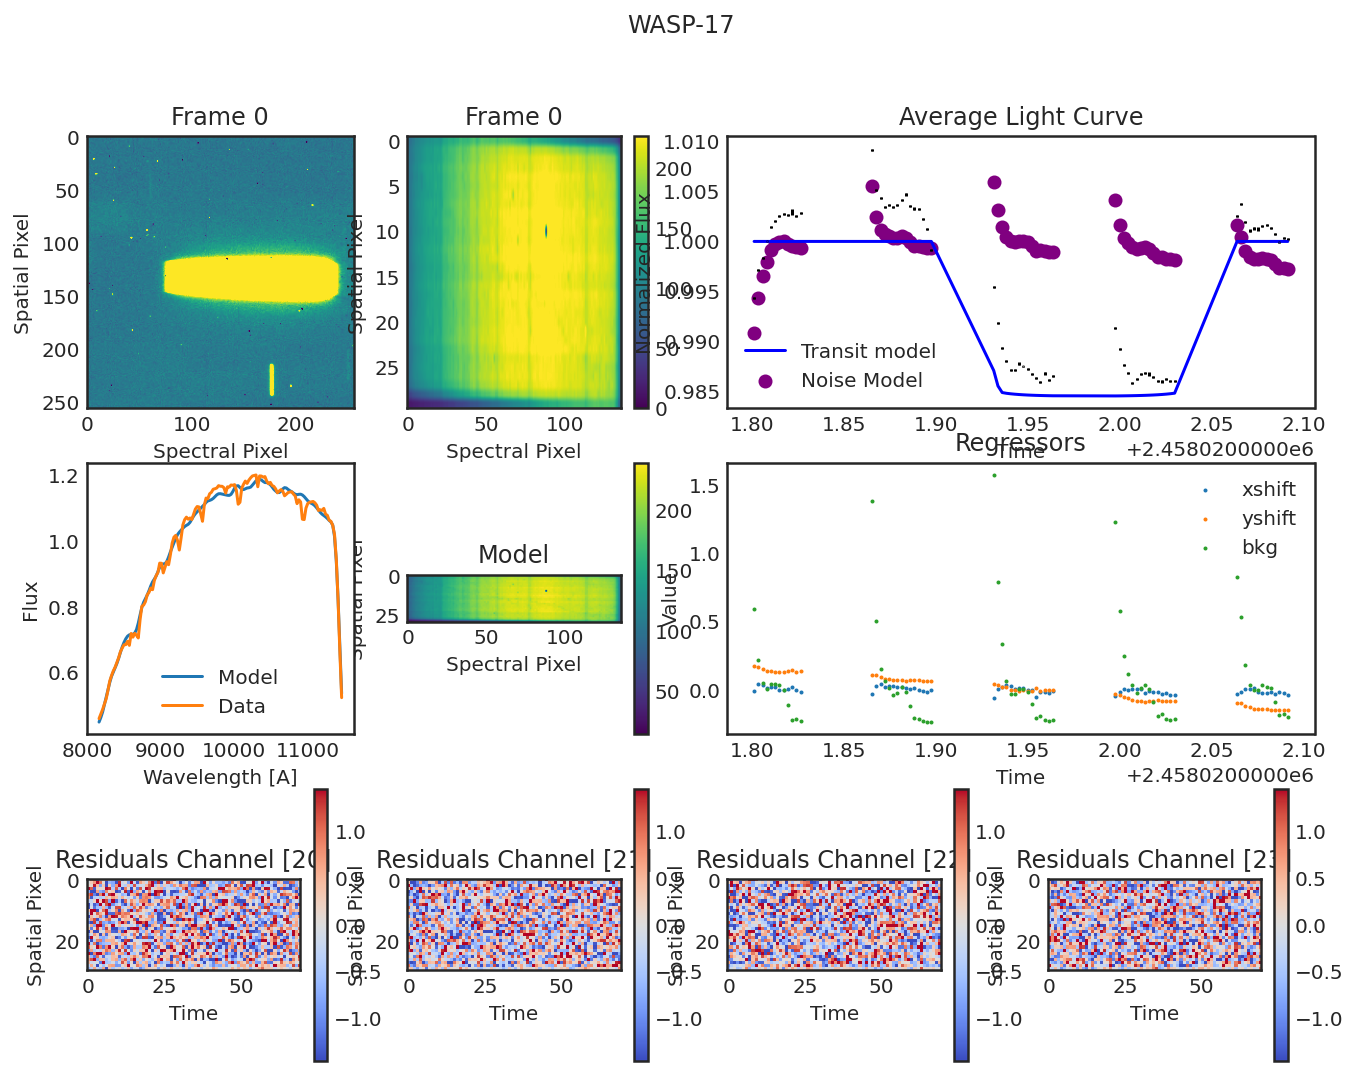

In [60]:
for visit in obs:
    visit.diagnose();
    plt.show();